## DOĞRUSAL REGRESYON
Her Model için;
* Model
* Tahmin
* Model Optimizasyon

# Basit Doğrusal Regresyon

In [902]:
from warnings import filterwarnings
filterwarnings('ignore')

In [903]:
#Kullanacağımız veri seti reklam harcaması kalemlerini veren bir veri seti
#TV'ye, Radyoya, Gazeteye reklamlar veriliyor ve reklamlar neticesinde satışlar elde ediliyor. 
#Satışlar ile farklı kalemlerdeki reklam harcamalarının ortaya çıkardığı bir veri setidir. 

In [1291]:
#veri setini yükleyelim
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4]) #bir sonraki satırdaki df.iloc'u çalıştırmak yerine burada usecols ile istediğimiz değişkenleri yazarak çağırabiliriz.
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [905]:
#df = df.iloc[:,1:len(df)] #indeksi değişken olarak görürse bu şekilde indeksi dışarıda bırakabiliriz.

In [906]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [907]:
df.isnull().values.any() #eksik değer olup olmadığını değerlendirelim

False

In [1292]:
df.corr() #değişkenlerin korelasyonlarını incelememizi sağlar

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [909]:
#korelasyon değerlerine göre şimdilik şunları söyleyebiliriz.
#*Tv reklamları arttıkça satışlar artacaktır
#Radyoda verilen reklamlarla satışlar arasında orta şiddette bir ilişki vardır
#Gazeteye verilen reklamlar ile satışlar arasında ise zayıf bir bağlantı olduğu görülmektedir.
#Bu bulgulara göre söyleyebiliriz ki en anlamlı değişken TV'dir.

## scikit-learn ile Modelleme
python da makine öğrenmesi algoritmalarını kullanmak için faydalanılan bir frameworktür.

In [1293]:
from sklearn.linear_model import LinearRegression

In [1294]:
X = df[["TV"]]
y = df["sales"]


In [1295]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [1296]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [1297]:
reg = LinearRegression()
model = reg.fit(X, y)

y=b0 + b1*xi

In [1298]:
model.intercept_ #sabit katsayıyı verir (bo)

7.032593549127693

In [913]:
model.coef_ #bağımsız değişkene ait katsayıyı verir (b1)

array([0.04753664])

In [914]:
# y=7.03 + 0.04*x

# Tahmin

In [915]:
#Örneğin TV kalemine 30 birimlik bir harcama yaparsak satışımız ne kadar olacaktırı elde ettiğimiz denklem ile hesaplayalım
# y=7.03 + 0.04*30
# = 8.23

In [916]:
model.predict([[30]]) #Tahmin için predict metodu kullanılır

array([8.45869276])

In [917]:
yeni_veri = [[5],[90],[200]] #birden falaz TV gözlemi için tahmin

In [918]:
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

## Artıklar ve Makine Öğrenmesindeki Önemi

In [919]:
from sklearn.metrics import mean_squared_error, r2_score #sklearn içerisinde kullanacağımız 2 metriği import ettik

In [920]:
y_pred=model.predict(X)

In [921]:
mse = mean_squared_error(y, y_pred)  #(mean squared error) (hata kareleri ortalaması)

In [922]:
mse

10.512652915656757

In [923]:
import numpy as np
rmse = np.sqrt(mse) #hata kareleri ortalaması karekökü

In [924]:
rmse

3.2423221486546887

In [925]:
r2=r2_score(y, y_pred)

In [926]:
r2

0.611875050850071

In [930]:
# adjusted R-squared    
Adj_r2 = 1 - ((1-r2) * (len(y)-1)/(len(y)-X.shape[1]-1))

In [931]:
Adj_r2

0.6099148238341623

R-squared:(R kare); Bağımsız değişkenin bağımlı değişkendeki değişkenliği açıklama başarısıdır. Yani elimizdeki TV değişkeni satış değişkeninde yer alan değişkenliğin yaklaşık %61'ini açıklayabilmektedir.

Adj. R-squared: (Düzeltilmiş R kare): R kare değeri formulasyonu itibariyle modele  ne kadar fazla değişken eklersek ekleyelim artmaya şişmeye meyillidir. Alakasız bir değişken eklesek bile artış gösterebilir. r kare arttığı için iyi bir yolda olduğumuzu düşünebiliriz fakat bu yanıltıcı olacaktır. Düzeltilmiş r kare , r karenin her parametre eklenmesine karşı olan duyarlılığını düzenleyen, törpüleyen, duyarlılığı daha az olan bir metriktir. Dolayısıyla  Adj. R-squared: (Düzeltilmiş R kare) değeri bizim için daha düzgün, önemli bir değer olacaktır.

In [932]:
model.predict(X)[0:10] #model aracılığı ile tahmin edilen değerler. Tahmin için predict metodu kullanılır

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [933]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [934]:
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": model.predict(X)[0:10]}) #karşılaştırma amacıyla gerçek ve tahmin edilen değerleri dataframe'e aktardık

In [935]:
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [936]:
residuals = y-y_pred
resid=residuals[0:10]

In [937]:
import matplotlib.pyplot as plt

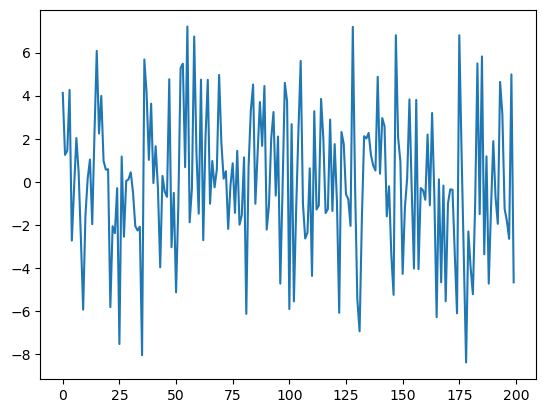

In [938]:
plt.plot(residuals)

In [939]:
#scikit-learn frameworkü dışında Statsmodels ile de doğrusal regresyon modeli kurulabilir

# Çoklu Doğrusal Regresyon¶


In [1299]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [941]:
df.shape

(200, 4)

In [1301]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [1302]:
#train_test_split: train,  test ayrımı için kullanılacak metot
#cross_val_score: çapraz doğrulama skorunu hesaplamak için kullanılacak metot
# cross_val_predict: çapraz doğrulama tahmini için kullanılacak metot

In [1306]:
X = df.drop("sales", axis = 1) #sales değişkenini dışarıda bırakıp tüm bağımsız değişkenleri seçiyoruz ve X'e atıyoruz
y = df["sales"] #Sales değişkenini de bağımlı değişken olarak y'ye atıyoruz

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)
#veri setini %20'si test %80'ni eğitim olacak şekilde rastgele ayırıyoruz. random_state ile her çalıştırdığımızda eğitim ve teste farklı random atamaları yapılmasın aynı olsun diye bir değer veriyruz.Bu değerin ne olduğunun şimdilik bizim için bir önemi yok.

In [1307]:
X_train.shape

(160, 3)

In [1308]:
y_train.shape

(160,)

In [947]:
X_test.shape

(40, 3)

In [948]:
y_test.shape

(40,)

In [949]:
training = df.copy() #veri setimizin ilk halini de korumak için bir değişkene kopyaladık

In [950]:
training.shape

(200, 4)

In [1309]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)#Model yalnızca eğitim verileri (bağımsız ve bağımlı değişkenleri) ile oluşturuldu.

In [952]:
model.intercept_ #sabit değeri verir

2.979067338122629

In [953]:
model.coef_ #bağımsız değişkenlere ait katsayıları verir

array([0.04472952, 0.18919505, 0.00276111])

## Tahmin

Model denklemi:

Sales = 2.97 + 0.04 * TV + 0.18 * radio + 0.002 * newspaper

Örneğin 30 birim TV harcaması, 10 birim radio harcamasi, 40 birimde gazete harcaması olduğunda satışların tahmini değeri ne olur?



In [954]:
yeni_veri = [[30], [10],[40]]

In [955]:
yeni_veri = pd.DataFrame(yeni_veri).T

In [956]:
yeni_veri

,0,1,2
0,30,10,40


In [957]:
model.predict(yeni_veri)

array([6.32334798])

In [1310]:
model.predict(X_train)

array([ 9.68827502, 12.67337707, 10.0553326 ,  8.20010235, 13.49562077,
        5.42585998,  9.2767456 , 14.14222434,  8.83116901, 11.63897134,
       15.42650259, 11.89014523, 12.82693587, 10.82735757,  6.58862301,
        9.93190159,  9.51414822, 24.0815284 ,  7.70552541, 12.49609325,
       17.71880786, 15.28339577, 11.42760282, 10.86633369, 16.78110726,
        6.93551369, 21.35732668,  6.16937955,  9.93897566, 11.52842846,
        9.29612342,  6.59177689, 14.90122344, 17.32216187, 15.80154544,
       16.28133624, 14.94912051, 19.55991189, 13.87795425, 21.04366162,
       12.62381325, 13.80024106,  8.96290787, 17.00702846,  8.41601918,
       15.28340432, 13.72169286, 23.2179245 , 12.53781447, 22.89655202,
        6.7146496 , 18.54942004, 23.38327322, 18.6439566 , 17.1342205 ,
       16.42698672, 12.44666834, 11.82149856, 16.94141141, 14.49733909,
       13.27071976,  7.69340245, 19.22784797,  9.63893927, 19.50751919,
       10.18954107,  7.09983872, 16.69074263, 13.75827407, 15.12

In [1311]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [1312]:
rmse

1.644727765644337

In [1313]:
model.predict(X_test) #model oluşturulurken hiç görmediği test verileri için model tahmini

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [962]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [963]:
rmse

1.7815996615334502

In [964]:
k_t = pd.DataFrame({"gercek_y": y_test,
                   "tahmin_y": model.predict(X_test)}) 

In [965]:
k_t

,gercek_y,tahmin_y
95,16.9,16.408024
15,22.4,20.889882
30,21.4,21.553843
158,7.3,10.608503
128,24.7,22.112373
115,12.6,13.105592
69,22.3,21.057192
170,8.4,7.461010
174,11.5,13.606346
45,14.9,15.155070


In [966]:
r2=r2_score(y_test, model.predict(X_test))

In [967]:
r2

0.899438024100912

In [970]:
# adjusted R-squared
Adj_r2 = 1 - ((1-r2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

In [971]:
Adj_r2

0.8910578594426547

## Model Tuning / Model Doğrulama
Çoklu doğrusal regresyonda dışsal parametre(hiperparametre) yok. Dolayısıyla burada model tuning(parametre ayarlama) değil Model doğrulama üzerinde duracağız.

In [972]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [973]:
X = df.drop('sales', axis=1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=144) 
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [974]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.6748559274650712

In [975]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.6640263686701033

In [976]:
model.score(X_train, y_train) #modele ait score metodu da tıpkı r2_score gibi rkare değerini döndürür.

0.8971614078663419

In [977]:
#modeli oluştururken random_state değerini değiştirdiğimizde her seferinde farklı rmse hata değerlerini aldığımızı görürüz.
#Bu da modeli  %80train,  %20test olarak ama hangisi kısımdan parçalama yapcağız belli değil.  random_state değerini her değiştirdiimizde veri setini farklı farklı train ve test gruplarına ayırdığı için rmse hata değerimiz farklı çıkmaktadır. 
# Daha doğru bir model oluşturmak ve daha doğru bir hatadan bahsedebilmek için cross validation (çarpraz doğrulama) yöntemi kullanılır.

In [978]:
r2_cross_score=cross_val_score(lm, X_train, y_train, cv = 10, scoring = "r2") #10 cross validation yapıldı.

In [979]:
r2_cross_score

array([0.86580772, 0.92273806, 0.90690214, 0.9124702 , 0.69765146,
       0.92654282, 0.92526348, 0.94823778, 0.92941476, 0.69875488])

In [980]:
r2_cross_score.mean()

0.8733783298422942

In [981]:
np.sqrt(-cross_val_score(lm, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")) #neg_mean_squared_error negatif sonuçlar ürettiği için en başa - koyarak onları bizim anlayacağımız hale getirdik

array([1.94167741, 1.17857794, 1.14676306, 1.82238742, 2.97070189,
       1.5424871 , 1.51235118, 1.02817521, 1.73070108, 1.77552332])

In [982]:
np.sqrt(-cross_val_score(lm, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1.6649345607872932

In [983]:
#eğitim setini valide ederek hatalara erişmek, valide edilmiş hataların prametrelerini,katsayılarını kullanarak tahmin üreten modeller yapmak daha doğru bir yaklaşımdır.

# Doğrusal Olmayan Regreson Modelleri

In [1026]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

# KNN

In [1322]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna() #sizler zaten eksik veri tamamlama işlemi yaptığınız için bu işlemi yapmayacaksınız
df.head()
#veri seti amerikan basketbolcuların bazı bilgilerini barındıran bir veri seti

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [1323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [1324]:
df["League"].value_counts()

A    139
N    124
Name: League, dtype: int64

In [1325]:
df["Division"].value_counts()

W    134
E    129
Name: Division, dtype: int64

In [1326]:
df["NewLeague"].value_counts()

A    141
N    122
Name: NewLeague, dtype: int64

In [1327]:
#Kategorik değişkenler için one hot dönüşümü gerçekleştirdik
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [1328]:
 #dummy tuzağına yakalandığımız için bu durumu ortadan bu şekilde kaldırmamız gerekiyor
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']], drop_first=True)
dms.head()

,League_N,Division_W,NewLeague_N
1,1,1,1
2,0,1,0
3,1,0,1
4,1,0,1
5,0,1,0


In [1329]:
y = df["Salary"] # bağımlı değişkeni y'ye atadık

In [1330]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")#burada bağımlı değişken ve kategorik değişkenleri veri setinden çıkardık

In [1331]:
X_

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0


In [1332]:
X_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AtBat    263 non-null    float64
 1   Hits     263 non-null    float64
 2   HmRun    263 non-null    float64
 3   Runs     263 non-null    float64
 4   RBI      263 non-null    float64
 5   Walks    263 non-null    float64
 6   Years    263 non-null    float64
 7   CAtBat   263 non-null    float64
 8   CHits    263 non-null    float64
 9   CHmRun   263 non-null    float64
 10  CRuns    263 non-null    float64
 11  CRBI     263 non-null    float64
 12  CWalks   263 non-null    float64
 13  PutOuts  263 non-null    float64
 14  Assists  263 non-null    float64
 15  Errors   263 non-null    float64
dtypes: float64(16)
memory usage: 34.9 KB


In [1333]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [1334]:
X = pd.concat([X_, dms], axis = 1)#sayısal bağımlı değişken ile düzenlediğimiz kategorik değişkenleri birleştirip X'e tüm bağımsız değişkenleri atmış oluyoruz
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [1335]:
#veri setini test ve train olarak ayırdık
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [1336]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [1337]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [1338]:
knn_model.n_neighbors #knn hiper parametresi k (komşuluk) değeridir. (default değerdir)

5

In [1339]:
knn_model.effective_metric_ #öklüt uzaklık ölçüsü kullanılmış. Aslında ön tanımlı değeri 'metric': 'minkowski' olarak görülüyor. Fakat minkowski ölçütünün p=2 değeri klasik euclideandır.
#Burada da bu şekilde olmuş bu nedenle default değer 'euclidean' olarak karşımıza çıktı.

'euclidean'

## Tahmin

In [1340]:
y_pred = knn_model.predict(X_test) #tahmin için yine predict kullanıyoruz

In [1341]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred))

In [1342]:
rmse

426.6570764525201

In [1343]:
#farklı k değerlerine karşılık eğitim rmse hatası nasıl değişiyor kontrol edelim

In [1344]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.6467132541376
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


## Model Tuning
**GridSearchCV** metodu ile optimum k sayısını belirleme işlemini gerçekleştireceğiz
Bundan sonraki metotlarda da **GridSearchCV** ile hiperparametre ayarlaması yapacağız. 
Olası parametre setinin verilip tüm olası kombinasyonların denenmesi ile bulunur

In [1345]:
from sklearn.model_selection import GridSearchCV

In [1346]:
knn_params = {'n_neighbors': np.arange(1,30,1)} # bir sözlük yapısı oluşturuyoruz
#metodun aldığı parametresi ne ise o şekilde bir isimlendirme yapmak gerekiyor. KNeighborsRegressor, n_neighbors isminde ir paramtre alıyordu.
#1'den 30'a kadar k (komşu) değerleri ürettik

In [1347]:
knn = KNeighborsRegressor()

In [1348]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)#model ismi, parametreler ve kaç fold cross validation yapmak istiyorsak onları parametre olarak gireceğiz
#knn_cv_model nesnesi tanımladık

In [1350]:
knn_cv_model.best_params_["n_neighbors"] # bulunan en uygun parametre değerini verir
#best_params fonksiyonu "mean_validation_score" değerine göre bir sıralama yapıyor. 

8

In [1054]:
#modelimizin eğitim ve nihayteinde kurulacak olan modelde yapılacak olan test hatasını mutlaka valide edilmiş (doğrulanmış) veri seti üzerinden yapmalıyız

In [1055]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])#tune edilmiş knn modelini kuralım
#tune edilmiş modelin nesnesini oluşturduk

In [1056]:
knn_tuned.fit(X_train, y_train) #knn_tuned nesnesini eğitim verileri üzerinde fit edelim

KNeighborsRegressor(n_neighbors=8)

In [1057]:
knn_tuned.predict(X_test)

array([ 624.583375,  812.083375,  846.25    ,  155.3125  ,  850.      ,
        310.9375  ,  215.3125  ,  125.5625  ,  751.875   ,  981.25    ,
        634.0625  ,  878.541625,  963.541625,  155.3125  ,  390.625   ,
        850.      ,  765.9375  ,   93.4375  ,  894.416625,  313.75    ,
        609.583375,  704.166625,  702.5     ,  481.145875,  469.0625  ,
         80.375   ,  915.696375,  418.75    ,  574.6875  ,   95.      ,
         92.1875  ,   73.8125  ,  638.333375,  229.375   ,  263.458375,
       1204.446375,  981.25    ,  230.625   ,   75.6875  ,  633.75    ,
         77.875   ,  115.5625  ,  660.416625,  565.729125,  861.875   ,
        685.9375  ,  850.      ,  107.8125  ,  155.3125  ,  704.375   ,
        706.25    ,  699.583375,  713.645875,  197.5     ,  111.5     ,
        738.4375  ,  691.666625,  843.229125,  188.270875,  987.5     ,
        981.25    ,  505.      ,  840.875   ,  566.875   ,  787.5     ,
         86.625   ])

In [1058]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test))) #model üzerinden test hatasını alalım

413.7094731463598

In [1059]:
r2=r2_score(y_test, knn_tuned.predict(X_test))

In [1063]:
r2

0.2093550739421146

# SVR (Support Vector Regression - Destek Vektör Regresyonu)
* Doğrusal SVR
* Doğrusal Olmayan SVR

# Doğrusal (lineer) SVR

In [1073]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [1074]:
# Basit doğrusal regresyon ile aralarındaki durumu değerlendirmek adına sadece tek bir değişken alarak SVR'ı kullanacağız
# Hit (basketbolcunun atış sayısı) değişkenini seçelim, bağımsız değişkenin train ve test'ini hit için oluşturalım. Bağımlı değişken y'nin train ve testi zaten aynı 

In [1075]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [1076]:
X_train

,Hits
183,91.0
229,144.0
286,152.0
102,49.0
153,95.0
...,...
24,168.0
236,52.0
93,138.0
137,103.0


In [1077]:
from sklearn.svm import SVR

In [1078]:
svr_model = SVR(kernel="linear").fit(X_train, y_train)

In [1079]:
svr_model.intercept_

array([-48.69756098])

In [1080]:
svr_model.coef_

array([[4.9695122]])

In [1081]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [1082]:
print ("y = {0} + {1} x".format(svr_model.intercept_, 
                                svr_model.coef_)) 

y = [-48.69756098] + [[4.9695122]] x


In [1083]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [1084]:
#Bu modeli kullanarak eğitim setinin hit değişkeninin ilk değerini kullanarak tahmin yapalım, gerçekten 403.52804878 çıkıyor mu bakalım

In [1085]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [1086]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [1087]:
y_pred = svr_model.predict(X_train)

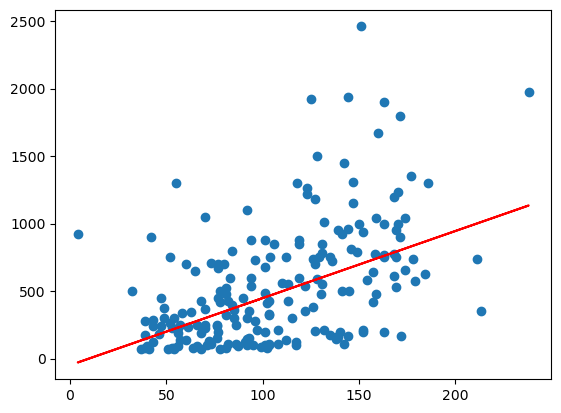

In [1088]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [1089]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x


In [1090]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

Text(0, 0.5, 'Maaş (Salary)')

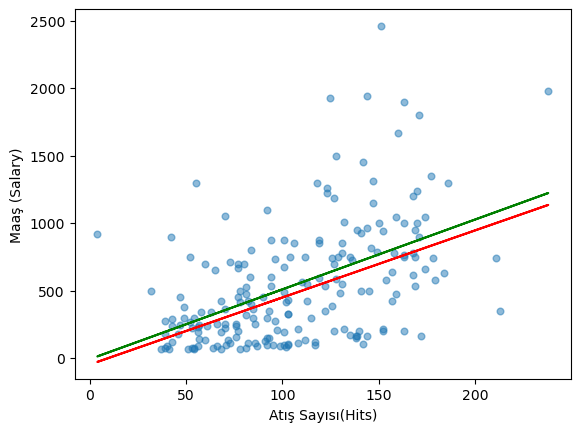

In [1091]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

In [1092]:
#SVR, güçlü (robust) bir metottur. Yukarıdaki grafikten görüleceği üzere aykırı değerler basit doğrusal regresyonu yukarı doğru çekmesine rağmen aykırı değerlerin SVR regresyonunua etkisi biraz daha düşük olmuştur.

## Tahmin

In [1093]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [1094]:
y_pred = svr_model.predict(X_test)

In [1095]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [1096]:
k_t = pd.DataFrame({"gercek_y": y_test,
                   "tahmin_y": y_pred}) 

In [1097]:
k_t

,gercek_y,tahmin_y
148,850.0,627.156098
154,277.5,681.820732
318,875.0,627.156098
279,150.0,428.375610
88,260.0,155.052439
...,...,...
122,400.0,642.064634
282,90.0,994.900000
111,385.0,328.985366
232,450.0,363.771951


## Model Tuning

In [1098]:
#ayarlamamız gereken parametre C parametresidir
svr_model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [1099]:
svr_params = {"C": np.arange(0.1,2,0.1)} #0.1'den 2'ye kadar 0.1 artış yapan değerleri C olarak denesin
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train) #10 çapraz doğrulama ile en iyi paramtre değerini bul

In [1100]:
svr_cv_model.best_params_

{'C': 0.1}

In [1101]:
svr_cv_model.best_params_["C"]

0.1

In [1102]:
svr_tuned = SVR(kernel= "linear", 
                C = svr_cv_model.best_params_["C"]).fit(X_train, y_train)



In [1103]:
y_pred = svr_tuned.predict(X_test)

In [1104]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

## Tek değişken değil de tüm değişkenleri baz alıp SVR uygulayalım

In [1105]:
from sklearn.svm import SVR
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [1106]:
svr_model = SVR(kernel="linear").fit(X_train, y_train)

In [1107]:
svr_params = {"C": np.arange(0.1,2,0.1)} #0.1'den 2'ye kadar 0.1 artış yapan değerleri C olarak denesin
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train) #10 çapraz doğrulama ile eğitim verileri için en iyi paramtre değerini bul

In [1108]:
svr_cv_model.best_params_

{'C': 0.4}

In [1109]:
svr_cv_model.best_params_["C"]

0.4

In [1110]:
svr_tuned = SVR(kernel= "linear", 
                C = svr_cv_model.best_params_["C"]).fit(X_train, y_train)



In [1111]:
y_pred = svr_tuned.predict(X_test)

In [1112]:
np.sqrt(mean_squared_error(y_test, y_pred))

367.538528365296

In [1113]:
k_t = pd.DataFrame({"gercek_y": y_test,
                   "tahmin_y": y_pred}) 

In [1114]:
k_t

,gercek_y,tahmin_y
148,850.0,656.039785
154,277.5,606.743115
318,875.0,927.454756
279,150.0,249.061706
88,260.0,570.259929
...,...,...
122,400.0,472.277812
282,90.0,981.365161
111,385.0,440.524532
232,450.0,584.339802


In [1115]:
r2=r2_score(y_test, y_pred)

In [1116]:
r2

0.3759831723320952

# Doğrusal Olmayan SVR

In [1119]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [1120]:
svr_rbf = SVR(kernel="rbf").fit(X_train, y_train) #Radial basis function ile kurulan bir SVR

## Tahmin

In [1121]:
y_pred = svr_rbf.predict(X_test)

In [1122]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

## Model Tuning

In [1123]:
svr_rbf.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [1124]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10).fit(X_train,y_train)

In [1125]:
svr_cv_model.best_params_

{'C': 50}

In [1126]:
svr_cv_model.best_params_['C']

50

In [1127]:
svr_tuned = SVR(kernel="rbf", C = svr_cv_model.best_params_['C']).fit(X_train, 
                                                                        y_train)


In [1128]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

In [1129]:
r2=r2_score(y_test, y_pred)

In [1130]:
r2

0.15377402364911363

# Çok Katmanlı Algılayıcı

In [1164]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [1165]:
#değişkenliklerdeki farklı ölçeklemeler, değişikenlerin birbirinden çok farklı olması, değişkenlikler (varyanslar) özellikle modellerden elde edilecek sonuçların güvenilirliğini düşürmektedir.
#Bundan dolayı özellikle YSA'da bir değişken standartlaştırma işlemi yapılması önerilmektedir.

In [1166]:
from sklearn.preprocessing import StandardScaler

In [1167]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [1168]:
X_train_scaled = scaler.transform(X_train)

In [1169]:
X_test_scaled = scaler.transform(X_test)

.fit(X_train) dediğimizde , X veri setinin standart sapması ve ortalaması hesaplanıyor.

.transform(X_train) dediğimizde bu hesaplanan standart sapma ve ortalamaya göre scale ediyor.

.transform(X_test) dediğimizde test veri setini train'in standart sapması ve ortalamasına göre scale ediyor.

Biz burda fit_transform(X_train) ve fit_transform(X_test) deseydik , örneğin X_traindeki 20 değeri 0.12 ye sabitlenirken,  X_test'teki 20 değeri 0.17 olurdu. Ama böyle tek bir veri setini örnek aldığımızda ikiside aynı değere sabitleniyor.

In [1170]:
from sklearn.neural_network import MLPRegressor

In [1171]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)

In [1172]:
mlp_model.n_layers_  #katman sayısını verir

3

In [1173]:
mlp_model.hidden_layer_sizes #gizli katmandaki nöron sayısı

(100,)

In [1174]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)#

In [1175]:
mlp_model.n_layers_  #katman sayısını verir. Yukarıda iki gizli katman belirttik 100 ve 20 nörondan oluşan. Python da MLP'ye gizli katman eklemenin yolu onun sahip olacağı nöron sayısını girmekten geçer.

4

In [1176]:
mlp_model.hidden_layer_sizes #gizli katmandaki nöron sayısı

(100, 20)

## Tahmin

In [1177]:
y_pred = mlp_model.predict(X_test_scaled)

In [1178]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.2057144273576

## Model Tuning

In [1179]:
mlp_model.get_params() #mevcut parametre ve dğerlerini görürüz.

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 20),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [1180]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic'],
             'max_iter': [100, 200, 300, 400, 500] }

In [1181]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, n_jobs = -1).fit(X_train_scaled, y_train) 
#n_jobs = -1, işlem çok uzun süreceğinden dolayı bu argümanla işlemcinin tam performans olarak çlaışmasını sağlarız

In [1182]:
mlp_cv_model.best_params_

{'activation': 'relu',
 'alpha': 0.1,
 'hidden_layer_sizes': (300, 200, 150),
 'max_iter': 400}

In [1183]:
mlp_tuned = MLPRegressor(alpha = 0.1, hidden_layer_sizes = (300,200,150), max_iter=400) #aktivasyon fonksiyonunun ön tanımlı hali zaten relu idi

In [1184]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.1, hidden_layer_sizes=(300, 200, 150), max_iter=400)

In [1185]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [1187]:
np.sqrt(mean_squared_error(y_test, y_pred))

377.0313951925486

In [1188]:
r2=r2_score(y_test, y_pred)

In [1189]:
r2

0.3433324018039404

# CART
Model, Tahmin ve Model Tuning

In [1190]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [1191]:
X_train.shape

(197, 19)

In [1192]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [1193]:
np.sqrt(mean_squared_error(y_test, y_pred)) #tune etmeden önceki ilkel hatamıza bakalım

426.2058800071649

In [1194]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [1195]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

#min_samples_split: bir düğümü bölmek için gereken minimum örnek sayısı
#max_leaf_nodes: ağacın sahip olacağı maksimum yaprak sayısı

In [1196]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)

In [1197]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 37}

In [1198]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)

In [1199]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [1200]:
y_pred = cart_tuned.predict(X_test)

In [1202]:
np.sqrt(mean_squared_error(y_test, y_pred))

376.39788207109865

In [1203]:
r2=r2_score(y_test, y_pred)

In [1205]:
r2

0.34553730061861554

In [1206]:
!pip install SKompiler[full]

In [1207]:
from skompiler import skompile

In [1208]:
print(skompile(cart_tuned.predict).to('python/code'))

(((920.0 if x[10] <= 10.0 else 165.17593055555557) if x[12] <= 122.5 else 
    391.46875) if x[8] <= 450.0 else ((475.18231249999997 if x[9] <= 145.5 else
    762.1527499999999) if x[0] <= 421.5 else (1230.0 if x[13] <= 85.0 else 
    775.6110833333333) if x[5] <= 78.5 else 1330.0) if x[4] <= 80.5 else 
    1266.9716666666666)



# Bagged Trees Regresyon

In [1209]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [1210]:
bag_model = BaggingRegressor()
bag_model.fit(X_train, y_train)

BaggingRegressor()

In [1211]:
bag_model.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [1212]:
bag_model.n_estimators #kaç ağaç oluşturulacağı bilgisidir. Ön tanımlı değeri 10'muş

10

In [1213]:
bag_model.estimators_ #oluşturulan ağaçları gösterir

[DecisionTreeRegressor(random_state=491352527),
 DecisionTreeRegressor(random_state=280239434),
 DecisionTreeRegressor(random_state=958456598),
 DecisionTreeRegressor(random_state=617378552),
 DecisionTreeRegressor(random_state=919992248),
 DecisionTreeRegressor(random_state=233742209),
 DecisionTreeRegressor(random_state=1838043339),
 DecisionTreeRegressor(random_state=1515808918),
 DecisionTreeRegressor(random_state=1257508605),
 DecisionTreeRegressor(random_state=707277466)]

In [1214]:
bag_model.estimators_samples_ #her bir ağaçta kullanılacak örneklerin bilgisini verir

[array([106,  82, 157, 183,  88, 141,  87, 147,  83,  87, 173,  81, 193,
        158, 125,  97, 118,  30,  99,  94, 164,  31, 102, 186, 184, 128,
         69,  68, 177,  57,  52,   4, 129, 145, 125, 114, 116, 116, 117,
        145,  69, 118,  59,  48,   1, 162,  34, 137, 103,  21,   4,  21,
        128,  60, 136, 109,  83, 107, 166, 178, 105, 170,  51,  56, 157,
         73,   8, 152, 111, 182, 165,  63, 132,  62, 155,  78, 194,  66,
        195,  92, 130, 106,  55,  69,  18, 141,  68,  41, 119,  34,  59,
         99,  72, 115, 113, 120,  90, 196, 105, 194, 151, 175,  59,  30,
         78, 189, 169,  76,  28,  35,  35,  36, 114,  90, 144, 121,  93,
        175, 144,  22,  85, 181,  69, 182, 135,  18,  68,  50, 172, 169,
        151,  22,  16,  10, 159,  31,  37,  73, 183,  97, 182,  18,  56,
        184,  18, 136,  88,  63, 124,   4,  12, 118,   8, 127,   9,  16,
        131, 173,   9,  67, 182, 194,  45, 159,  64, 173, 183, 177,  56,
        191,  33,   1,   6,  72,  49,  20,  77,  27

## Tahmin

In [1215]:
y_pred = bag_model.predict(X_test)

In [1216]:
np.sqrt(mean_squared_error(y_test, y_pred))#tune edilmeden önceki ilkel test değerleri

320.4443911389118

In [1217]:
#Tek tek ağaçları sorgulayabiliriz, bu sayede hangi ağaçların regresyonda daha etkili hangilerinin daha etkisiz kötü olduğunu anlayabilriiz.

In [1218]:
iki_y = bag_model.estimators_[1].fit(X_train, y_train)#2 numaralı ağacın fikri

In [1219]:
iki_y_pred=iki_y.predict(X_test)

In [1220]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

449.22683135115943

In [1221]:
sekiz_y_pred = bag_model.estimators_[7].fit(X_train, y_train).predict(X_test)

In [1222]:
np.sqrt(mean_squared_error(y_test, sekiz_y_pred))

572.649358874701

Bagging'te bir gözlem birimi için bagging'i bir bütün olarak ele aldığımızda önce tüm ağaçlardan tahmin sonuçları talep ediliyor ondan sonra gelen tahminlerin ortalaması alınıyor ve elde sadece bir tane tahmin değeri oluyor. Dolayısıyla eldeki tahmin değeri ile gerçek değer karşılaştırılıp hata hesaplanıyor.

# Model Tuning

In [1233]:
bag_model = BaggingRegressor()
bag_model.fit(X_train, y_train)

BaggingRegressor()

In [1234]:
bag_params = {"n_estimators": range(2,20)}

In [1235]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10).fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(),
             param_grid={'n_estimators': range(2, 20)})

In [1237]:
bag_cv_model.best_params_

{'n_estimators': 14}

In [1238]:
bag_tuned = BaggingRegressor( n_estimators = 14, random_state=45) #her çalıştırdığımızda farklı örnekler seçmesin diye random_state'e bir değer atadık

In [1239]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=14, random_state=45)

In [1240]:
y_pred = bag_tuned.predict(X_test)

In [1243]:
np.sqrt(mean_squared_error(y_test, y_pred))

346.457987188104

In [1244]:
r2=r2_score(y_test, y_pred)
r2

0.4455125601129829

# Random Forests

In [1268]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [1269]:
from sklearn.ensemble import RandomForestRegressor

In [1270]:
rf_model = RandomForestRegressor(random_state = 42)

In [1271]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [1272]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

'n_estimators (ağaç sayısı)', 'max_features(Bölünmelerde kullanılacak Değişken sayısı)' ve 'max_depth (Ağaç Derinliği' en önemli parametreleridir

## Tahmin

In [1273]:
y_pred = rf_model.predict(X_test)

In [1274]:
np.sqrt(mean_squared_error(y_test, y_pred))#tune edilmeden önceki ilkel test hatası

344.8191624908484

## Model Tuning

In [1275]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [1276]:
rf_model = RandomForestRegressor(random_state = 42)

In [1277]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1).fit(X_train, y_train)
#n_jobs = -1, işlem çok uzun süreceğinden dolayı bu argümanla işlemcinin tam performans olarak çlaışmasını sağlarız

In [1279]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [1280]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200).fit(X_train, y_train)

In [1282]:
y_pred = rf_tuned.predict(X_test)

In [1285]:
np.sqrt(mean_squared_error(y_test, y_pred))

346.7946154872105

In [1286]:
r2=r2_score(y_test, y_pred)
r2

0.44443452554109686

In [1287]:
rf_tuned.feature_importances_  #özelliklerin önem derecesini döndürür

array([0.04869621, 0.05653915, 0.02645462, 0.04513733, 0.04325797,
       0.06016199, 0.04332181, 0.10422976, 0.07839587, 0.06941598,
       0.09766364, 0.1513357 , 0.08343871, 0.05062766, 0.01592963,
       0.01555903, 0.00298245, 0.00384261, 0.00300988])

In [1288]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

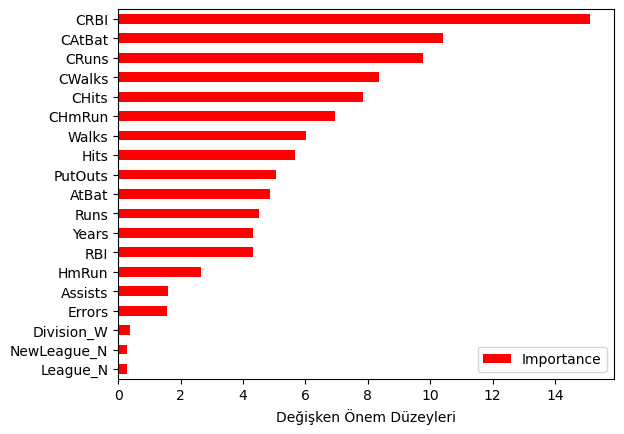

In [1289]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")
#importance'ye göre sırala ve çizdir